In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load dataset
df = pd.read_csv('CP_count_Ha.csv')


In [2]:

df

InChIKey  737823  737824  688422  688810  688812  \
0      IENZQIKPVFGBNW-UHFFFAOYSA-N      -1      -1      -1      -1      -1   
1      GSDSWSVVBLHKDQ-UHFFFAOYSA-N      -1      -1      -1      -1      -1   
2      CGIGDMFJXJATDK-UHFFFAOYSA-N      -1      -1      -1      -1      -1   
3      DSXXEELGXBCYNQ-UHFFFAOYSA-N      -1      -1      -1      -1      -1   
4      MYSWGUAQZAJSOK-UHFFFAOYSA-N      -1      -1      -1      -1      -1   
...                            ...     ...     ...     ...     ...     ...   
10521  YAJYINBQFXCAPI-WENCSYSZSA-N      -1      -1      -1      -1      -1   
10522  DIBJIDYNEHVBAV-KFRKLSNLSA-N      -1      -1      -1      -1      -1   
10523  YAJYINBQFXCAPI-VPYPWEPUSA-N      -1      -1      -1      -1      -1   
10524  YAJYINBQFXCAPI-RZIGYZOXSA-N      -1      -1      -1       0      -1   
10525  YAJYINBQFXCAPI-XJGOYTCSSA-N      -1      -1      -1      -1      -1   

       688816  688724  688739  688759  ...  \
0          -1      -1      -1      -1  ...   
1          -1      -1      -1      -1  ...   
2          -1      -1      -1      -1  ...   
3          -1      -1      -1      -1  ...   
4          -1      -1      -1      -1  ...   
...       ...     ...     ...     ...  ...   
10521      -1      -1      -1      -1  ...   
10522      -1      -1       0      -1  ...   
10523      -1      -1      -1      -1  ...   
10524      -1      -1      -1       0  ...   
10525      -1      -1      -1      -1  ...   

       Cells_Neighbors_FirstClosestObjectNumber_Adjacent  \
0                                             -15.605469   
1                                               3.030769   
2                                              -6.011719   
3                                             -31.820312   
4                                               4.070312   
...                                                  ...   
10521                                          -3.171875   
10522                                          -2.031250   
10523                                          -0.804688   
10524                                           0.820312   
10525                                          -9.492188   

       Cells_Neighbors_SecondClosestObjectNumber_5  \
0                                       -14.804688   
1                                         3.807692   
2                                        -5.312500   
3                                       -31.812500   
4                                         3.593750   
...                                            ...   
10521                                    -3.062500   
10522                                    -1.648438   
10523                                    -2.265625   
10524                                     0.843750   
10525                                    -9.835938   

       Cells_Neighbors_SecondClosestObjectNumber_Adjacent  \
0                                             -14.804688    
1                                               3.807692    
2                                              -5.312500    
3                                             -31.812500    
4                                               3.593750    
...                                                  ...    
10521                                          -3.062500    
10522                                          -1.648438    
10523                                          -2.265625    
10524                                           0.843750    
10525                                          -9.835938    

       Cells_Parent_Nuclei  Cytoplasm_Number_Object_Number  \
0               -15.648438                      -15.648438   
1                 3.607692                        3.607692   
2                -6.164062                       -6.164062   
3               -31.828125                      -31.828125   
4                 3.617188                        3.617188   
...                    ...                             ...   

In [10]:
assay_columns = df.columns[1:-12]
assay_columns

Index(['737823', '737824', '688422', '688810', '688812', '688816', '688724',
       '688739', '688759', '688238',
       ...
       '1301593', '1301717', '1301709', '688671', '845206', '1301866',
       '1301890', '1301859', '1301893', '1495346'],
      dtype='object', length=201)

In [27]:
df["845196"].value_counts()

-1    10145
 1      255
 0      126
Name: 845196, dtype: int64

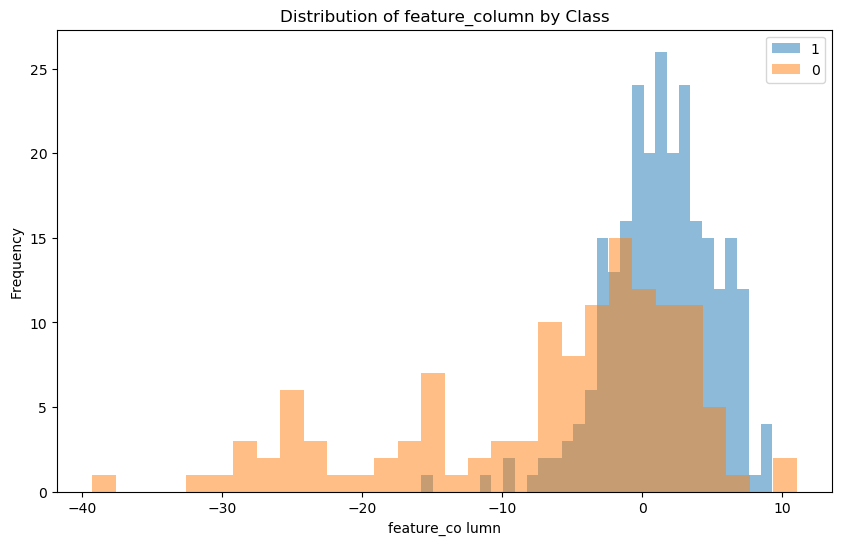

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


# Filter the data by class
data_class1 = df[df['845196'] == 1]['Cells_Number_Object_Number']
data_class2 = df[df['845196'] == 0]['Cells_Number_Object_Number']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(data_class1, alpha=0.5, label='1', bins=30)
plt.hist(data_class2, alpha=0.5, label='0', bins=30)
plt.title('Distribution of feature_column by Class')
plt.xlabel('feature_co lumn')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [29]:
(1-4000)/4000

-0.99975

In [30]:
import pandas as pd
from tqdm import tqdm

# Initialize a list to collect the results
melts = []

# Iterate over the rows of the DataFrame
for row in tqdm(df.itertuples(index=False)):
    inchikey = row.InChIKey
    for i, value in enumerate(row[1:], start=1):
        if value in [0, 1]:
            melts.append({"InChIKey": inchikey, "Task": df.columns[i], "Label": value})

# Convert the collected results to a DataFrame
melt = pd.DataFrame(melts)

# Display the result
melt


10526it [00:00, 16836.94it/s]


InChIKey      Task  Label
0      IENZQIKPVFGBNW-UHFFFAOYSA-N    737822    0.0
1      IENZQIKPVFGBNW-UHFFFAOYSA-N    737826    0.0
2      IENZQIKPVFGBNW-UHFFFAOYSA-N  737823_1    0.0
3      IENZQIKPVFGBNW-UHFFFAOYSA-N  737824_1    0.0
4      IENZQIKPVFGBNW-UHFFFAOYSA-N   1495242    0.0
...                            ...       ...    ...
54777  YAJYINBQFXCAPI-RZIGYZOXSA-N    688653    0.0
54778  YAJYINBQFXCAPI-RZIGYZOXSA-N  688238_1    0.0
54779  YAJYINBQFXCAPI-XJGOYTCSSA-N    688239    0.0
54780  YAJYINBQFXCAPI-XJGOYTCSSA-N    688267    0.0
54781  YAJYINBQFXCAPI-XJGOYTCSSA-N  688239_1    0.0

[54782 rows x 3 columns]

In [31]:
numerical_features = ['Cells_Number_Object_Number']

others = [ 'Cells_Neighbors_FirstClosestObjectNumber_5',
          'Cells_Neighbors_FirstClosestObjectNumber_Adjacent',
 'Cells_Neighbors_SecondClosestObjectNumber_5',
 'Cells_Neighbors_SecondClosestObjectNumber_Adjacent',
 'Cells_Parent_Nuclei',
 'Cytoplasm_Number_Object_Number',
 'Cytoplasm_Parent_Cells',
 'Cytoplasm_Parent_Nuclei',
 'Nuclei_Neighbors_FirstClosestObjectNumber_1',
 'Nuclei_Neighbors_SecondClosestObjectNumber_1',
 'Nuclei_Number_Object_Number']

features = df[["InChIKey"]+numerical_features]
features

InChIKey  Cells_Number_Object_Number
0      IENZQIKPVFGBNW-UHFFFAOYSA-N                  -15.648438
1      GSDSWSVVBLHKDQ-UHFFFAOYSA-N                    3.607692
2      CGIGDMFJXJATDK-UHFFFAOYSA-N                   -6.164062
3      DSXXEELGXBCYNQ-UHFFFAOYSA-N                  -31.828125
4      MYSWGUAQZAJSOK-UHFFFAOYSA-N                    3.617188
...                            ...                         ...
10521  YAJYINBQFXCAPI-WENCSYSZSA-N                   -3.632812
10522  DIBJIDYNEHVBAV-KFRKLSNLSA-N                   -3.046875
10523  YAJYINBQFXCAPI-VPYPWEPUSA-N                   -1.875000
10524  YAJYINBQFXCAPI-RZIGYZOXSA-N                    1.796875
10525  YAJYINBQFXCAPI-XJGOYTCSSA-N                   -9.460938

[10526 rows x 2 columns]

In [32]:
data = pd.merge(melt, features)
data

InChIKey      Task  Label  \
0      IENZQIKPVFGBNW-UHFFFAOYSA-N    737822    0.0   
1      IENZQIKPVFGBNW-UHFFFAOYSA-N    737826    0.0   
2      IENZQIKPVFGBNW-UHFFFAOYSA-N  737823_1    0.0   
3      IENZQIKPVFGBNW-UHFFFAOYSA-N  737824_1    0.0   
4      IENZQIKPVFGBNW-UHFFFAOYSA-N   1495242    0.0   
...                            ...       ...    ...   
54777  YAJYINBQFXCAPI-RZIGYZOXSA-N    688653    0.0   
54778  YAJYINBQFXCAPI-RZIGYZOXSA-N  688238_1    0.0   
54779  YAJYINBQFXCAPI-XJGOYTCSSA-N    688239    0.0   
54780  YAJYINBQFXCAPI-XJGOYTCSSA-N    688267    0.0   
54781  YAJYINBQFXCAPI-XJGOYTCSSA-N  688239_1    0.0   

       Cells_Number_Object_Number  
0                      -15.648438  
1                      -15.648438  
2                      -15.648438  
3                      -15.648438  
4                      -15.648438  
...                           ...  
54777                    1.796875  
54778                    1.796875  
54779                   -9.460938  
54780                   -9.460938  
54781                   -9.460938  

[54782 rows x 4 columns]

In [33]:
data.Task.nunique()

213

In [34]:
import json

# Load the JSON file containing the task splits
with open('data/output/data_split.json', 'r') as f:
    task_splits = json.load(f)

train_tasks = task_splits['train']
test_tasks = task_splits['test']

In [35]:
train_data = data[data["Task"].isin(train_tasks)]
train_data

InChIKey      Task  Label  \
0      IENZQIKPVFGBNW-UHFFFAOYSA-N    737822    0.0   
2      IENZQIKPVFGBNW-UHFFFAOYSA-N  737823_1    0.0   
4      IENZQIKPVFGBNW-UHFFFAOYSA-N   1495242    0.0   
5      IENZQIKPVFGBNW-UHFFFAOYSA-N   1495404    0.0   
7      IENZQIKPVFGBNW-UHFFFAOYSA-N   1495415    1.0   
...                            ...       ...    ...   
54776  YAJYINBQFXCAPI-RZIGYZOXSA-N    688238    0.0   
54777  YAJYINBQFXCAPI-RZIGYZOXSA-N    688653    0.0   
54778  YAJYINBQFXCAPI-RZIGYZOXSA-N  688238_1    0.0   
54779  YAJYINBQFXCAPI-XJGOYTCSSA-N    688239    0.0   
54781  YAJYINBQFXCAPI-XJGOYTCSSA-N  688239_1    0.0   

       Cells_Number_Object_Number  
0                      -15.648438  
2                      -15.648438  
4                      -15.648438  
5                      -15.648438  
7                      -15.648438  
...                           ...  
54776                    1.796875  
54777                    1.796875  
54778                    1.796875  
54779                   -9.460938  
54781                   -9.460938  

[39637 rows x 4 columns]

In [37]:
train_data.Task.nunique()

161

In [36]:
train_data.describe()

Label  Cells_Number_Object_Number
count  39637.000000                39637.000000
mean       0.304110                   -3.354973
std        0.460035                    9.766936
min        0.000000                  -50.067797
25%        0.000000                   -5.788306
50%        0.000000                   -0.523438
75%        1.000000                    2.726562
max        1.000000                   17.648438

In [13]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_rel
from sklearn.metrics import roc_auc_score

# Initialize your data frame 'train_data' here
df = train_data

# Define a function to calculate probability score
def calculate_probability_score(value, threshold):
    return 1 / (1 + np.exp(value - threshold))

# Define a range of thresholds to test
thresholds = np.linspace(-10, 10, 50)  # Increased the resolution to 200 steps

# Initialize a dictionary to store AUC scores for each threshold and task
task_threshold_auc = {threshold: [] for threshold in thresholds}

# Group by task
tasks = df['Task'].unique()

for task in tasks:
    task_df = df[df['Task'] == task].copy()
    for threshold in thresholds:
        task_df['Probability'] = task_df['Cells_Number_Object_Number'].apply(lambda x: calculate_probability_score(x, threshold))
        if len(task_df['Label'].unique()) > 1:  # Check if there are both 0 and 1 labels
            auc = roc_auc_score(task_df['Label'], task_df['Probability'])
            task_threshold_auc[threshold].append(auc)

# Convert the dictionary to a DataFrame for easier manipulation
auc_df = pd.DataFrame.from_dict(task_threshold_auc, orient='index', columns=tasks)

# Calculate the mean AUC for each threshold across all tasks
mean_auc = auc_df.mean(axis=1)

# Find the threshold with the highest mean AUC
best_threshold = mean_auc.idxmax()
best_auc = mean_auc.max()

# Perform a t-test to check if the best threshold is significantly better than others
thresholds_to_compare = [t for t in thresholds if t != best_threshold]
p_values = {}

for t in thresholds_to_compare:
    t_stat, p_val = ttest_rel(auc_df.loc[best_threshold], auc_df.loc[t])
    p_values[t] = p_val

# Output the best threshold, best AUC, and significant p-values
print(f"Best Threshold: {best_threshold}")
print(f"Best AUC: {best_auc}")

# Find and print significant p-values (e.g., p < 0.05)
significant_p_values = {k: v for k, v in p_values.items() if v < 0.05}
print("Significant p-values (threshold vs. best threshold):")
print(significant_p_values)

Best Threshold: 4.6938775510204085
Best AUC: 0.7050144845795129
Significant p-values (threshold vs. best threshold):
{-10.0: 3.2699780610789756e-09, -9.591836734693878: 3.2699780610789756e-09, -9.183673469387756: 3.2699780610789756e-09, -8.775510204081632: 3.2699780610789756e-09, -8.36734693877551: 3.2699780610789756e-09, -7.959183673469388: 2.4408059085680876e-09, -7.551020408163265: 2.1116405326157643e-09, -7.142857142857142: 2.0872275840429673e-09, -6.73469387755102: 2.110738288624702e-09, -6.326530612244898: 2.110738288624702e-09, -5.918367346938775: 2.085736279291577e-09, -5.5102040816326525: 2.54761176788089e-09, -5.1020408163265305: 2.6137509633469524e-09, -4.6938775510204085: 2.613750963346895e-09, -4.285714285714286: 2.0612586870597622e-09, -3.8775510204081627: 2.4729687863492646e-09, -3.4693877551020407: 2.4497740135621443e-09, -3.0612244897959187: 2.3324231420684996e-09, -2.6530612244897958: 2.3311193102844738e-09, -2.244897959183673: 1.1721325728595837e-09, -1.8367346938775

In [19]:
test_data = data[data["Task"].isin(test_tasks)]
test_data

InChIKey      Task  Label  \
1      IENZQIKPVFGBNW-UHFFFAOYSA-N    737826    0.0   
3      IENZQIKPVFGBNW-UHFFFAOYSA-N  737824_1    0.0   
6      IENZQIKPVFGBNW-UHFFFAOYSA-N   1495405    1.0   
21     GSDSWSVVBLHKDQ-UHFFFAOYSA-N   1495405    0.0   
27     CGIGDMFJXJATDK-UHFFFAOYSA-N    737826    0.0   
...                            ...       ...    ...   
54744  FWSWMSADSURGNY-UHFFFAOYSA-N    600886    1.0   
54747  GWQLLHKETFNQCK-UHFFFAOYSA-N    600886    0.0   
54751  MCWFXQXXVFZOIE-UHFFFAOYSA-N    688267    1.0   
54759  GYWXTRVEUURNEW-TVDBPQCTSA-N    688267    0.0   
54780  YAJYINBQFXCAPI-XJGOYTCSSA-N    688267    0.0   

       Cells_Number_Object_Number  
1                      -15.648438  
3                      -15.648438  
6                      -15.648438  
21                       3.607692  
27                      -6.164062  
...                           ...  
54744                    2.921875  
54747                    2.003906  
54751                   -5.089844  
54759                  -10.726562  
54780                   -9.460938  

[6599 rows x 4 columns]

In [20]:
# Define a function to calculate a probability score based on the distance from the threshold
def calculate_probability_scores(value, threshold=4.6938775510204085):
    return (1 / (1 + np.exp(value - threshold)))

# Calculate the probability score
test_data.loc[:, 'Probability'] = test_data['Cells_Number_Object_Number'].apply(calculate_probability_scores)
test_data

/home/jupyter-seal@broadinstitut-41f01/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


InChIKey      Task  Label  \
1      IENZQIKPVFGBNW-UHFFFAOYSA-N    737826    0.0   
3      IENZQIKPVFGBNW-UHFFFAOYSA-N  737824_1    0.0   
6      IENZQIKPVFGBNW-UHFFFAOYSA-N   1495405    1.0   
21     GSDSWSVVBLHKDQ-UHFFFAOYSA-N   1495405    0.0   
27     CGIGDMFJXJATDK-UHFFFAOYSA-N    737826    0.0   
...                            ...       ...    ...   
54744  FWSWMSADSURGNY-UHFFFAOYSA-N    600886    1.0   
54747  GWQLLHKETFNQCK-UHFFFAOYSA-N    600886    0.0   
54751  MCWFXQXXVFZOIE-UHFFFAOYSA-N    688267    1.0   
54759  GYWXTRVEUURNEW-TVDBPQCTSA-N    688267    0.0   
54780  YAJYINBQFXCAPI-XJGOYTCSSA-N    688267    0.0   

       Cells_Number_Object_Number  Probability  
1                      -15.648438     1.000000  
3                      -15.648438     1.000000  
6                      -15.648438     1.000000  
21                       3.607692     0.747663  
27                      -6.164062     0.999981  
...                           ...          ...  
54744                    2.921875     0.854707  
54747                    2.003906     0.936432  
54751                   -5.089844     0.999944  
54759                  -10.726562     1.000000  
54780                   -9.460938     0.999999  

[6599 rows x 5 columns]

In [21]:
calculate_probability_scores(5)

0.424061486151752

In [22]:
import pandas as pd
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, roc_auc_score

# Assuming `results_df` is already created as shown in your code

# Initialize a list to store the results
metrics_list = []

for task in test_data.Task.unique():
    subdata = test_data[test_data["Task"] == task]
    auc = roc_auc_score(subdata['Label'], subdata['Probability'])

    # Print the results
    print(f"Task: {task}")
    print(f"AUC: {auc:.2f}")
    print("-" * 60)

    # Append the results to the list
    metrics_list.append({
        'Task': task,
        'AUC_CC': auc,
    })

# Convert the list of dictionaries to a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display the DataFrame
print(metrics_df)

# Save the DataFrame to a CSV file
metrics_df.to_csv('task_metrics_rule_based.csv', index=False)


Task: 737826
AUC: 0.41
------------------------------------------------------------
Task: 737824_1
AUC: 0.44
------------------------------------------------------------
Task: 1495405
AUC: 0.67
------------------------------------------------------------
Task: 737825
AUC: 0.54
------------------------------------------------------------
Task: 752594
AUC: 0.75
------------------------------------------------------------
Task: 600886
AUC: 0.50
------------------------------------------------------------
Task: 752347
AUC: 0.60
------------------------------------------------------------
Task: 809095
AUC: 0.60
------------------------------------------------------------
Task: 845173
AUC: 0.85
------------------------------------------------------------
Task: 845196
AUC: 0.24
------------------------------------------------------------
Task: 752496
AUC: 0.55
------------------------------------------------------------
Task: 752509
AUC: 0.63
--------------------------------------------------

In [24]:
# Define a function to calculate a probability score based on the distance from the threshold
def calculate_probability_scores(value, threshold=4.6938775510204085):
    return (1- (1 / (1 + np.exp(value - threshold))))

# Calculate the probability score
test_data.loc[:, 'Probability'] = test_data['Cells_Number_Object_Number'].apply(calculate_probability_scores)
test_data

import pandas as pd
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, roc_auc_score

# Assuming `results_df` is already created as shown in your code

# Initialize a list to store the results
metrics_list = []

for task in test_data.Task.unique():
    subdata = test_data[test_data["Task"] == task]
    auc = roc_auc_score(subdata['Label'], subdata['Probability'])

    # Print the results
    print(f"Task: {task}")
    print(f"AUC_CC_r: {auc:.2f}")
    print("-" * 60)

    # Append the results to the list
    metrics_list.append({
        'Task': task,
        'AUC_CC_r': auc,
    })

# Convert the list of dictionaries to a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display the DataFrame
print(metrics_df)

# Save the DataFrame to a CSV file
metrics_df.to_csv('task_metrics_rule_based_reverse.csv', index=False)


Task: 737826
AUC_CC_r: 0.59
------------------------------------------------------------
Task: 737824_1
AUC_CC_r: 0.56
------------------------------------------------------------
Task: 1495405
AUC_CC_r: 0.33
------------------------------------------------------------
Task: 737825
AUC_CC_r: 0.46
------------------------------------------------------------
Task: 752594
AUC_CC_r: 0.25
------------------------------------------------------------
Task: 600886
AUC_CC_r: 0.50
------------------------------------------------------------
Task: 752347
AUC_CC_r: 0.40
------------------------------------------------------------
Task: 809095
AUC_CC_r: 0.40
------------------------------------------------------------
Task: 845173
AUC_CC_r: 0.15
------------------------------------------------------------
Task: 845196
AUC_CC_r: 0.76
------------------------------------------------------------
Task: 752496
AUC_CC_r: 0.45
------------------------------------------------------------
Task: 752509
AUC_C

/home/jupyter-seal@broadinstitut-41f01/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [38]:
metrics_df

Task  AUC_CC_r
0     737826  0.587687
1   737824_1  0.562860
2    1495405  0.325619
3     737825  0.462198
4     752594  0.254878
5     600886  0.502972
6     752347  0.397221
7     809095  0.395089
8     845173  0.154769
9     845196  0.762870
10    752496  0.453569
11    752509  0.368702
12    954338  0.515752
13    737400  0.434726
14    737053  0.494202
15    736947  0.416600
16    845206  0.491256
17    688267  0.583256